In [25]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [50]:
fixed_locs, pairs = pickle.load(open('out.pkl', 'rb'))
inferred = []
true = []
for k, v in pairs.items():
    inferred.append(v[:2])
    true.append(v[2:])
inferred = np.stack(inferred)
true = np.stack(true)
print(true.shape, inferred.shape, fixed_locs.shape)
print("true min", true.min(0))
print("true max", true.max(0))
print("inf min", inferred.min(0))
print("inf max", inferred.max(0))
print("fixed min", fixed_locs[~np.isnan(fixed_locs[:, 0])].min(0))
print("fixed max", fixed_locs[~np.isnan(fixed_locs[:, 0])].max(0))

(414, 2) (414, 2) (41016, 2)
true min [ -54.7      -170.460341]
true max [ 69.        169.2823639]
inf min [ 16.515784 -88.875258]
inf max [56.03622222 69.33886111]
fixed min [-107.9653582 -175.1155167]
fixed max [ 75.24     175.109078]


center [39.08034345 15.44401353]


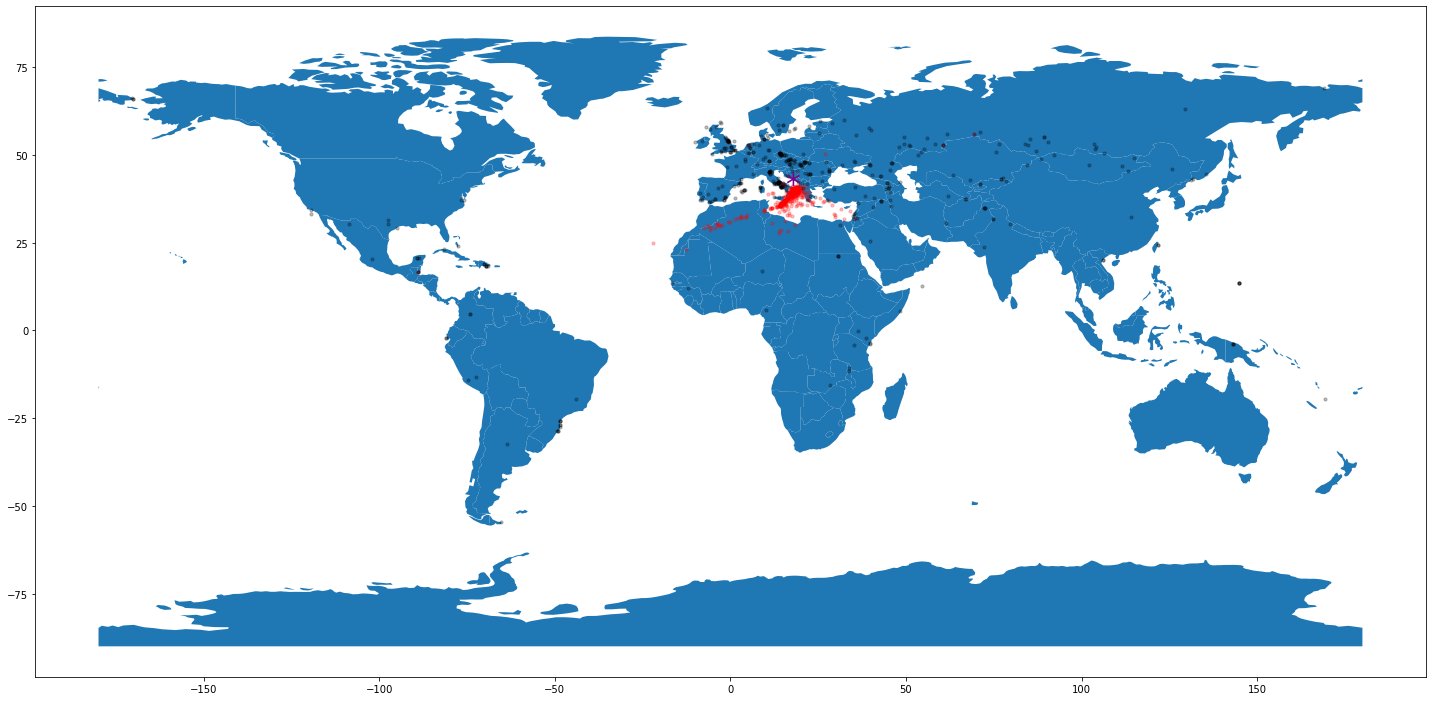

In [60]:
def get_gdf(locs):
    geometry = [Point(xy[::-1]) for xy in locs]
    return GeoDataFrame(pd.DataFrame(np.arange(locs.shape[0])), geometry=geometry)   

inf_gdf = get_gdf(inferred)
true_gdf = get_gdf(true)
fixed_locs_gdf = get_gdf(fixed_locs)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20, 12))
inf_gdf.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.25)
true_gdf.plot(ax=ax, marker='o', color='k', markersize=10, alpha=0.25)
#fixed_locs_gdf.plot(ax=ax, marker='x', color='green', markersize=5, alpha=0.1)
center = fixed_locs.mean(0)
ax.annotate("*", xy=center[::-1], size=30, color='purple')
print("center", center)

if False:
    for inf_loc, true_loc in zip(inferred, true):
        ax.annotate("", xytext=inf_loc, xy=true_loc, arrowprops=dict(arrowstyle="->", color='k'), 
                    size=10, alpha=0.3)

plt.tight_layout()
plt.savefig('black.png')